In [1]:
import pickle
import numpy as np
from gembed.multigraph import Multigraph

with open('results/karate_embeddings.pkl', 'rb') as inobj:
    embeddings = pickle.load(inobj)
with open('results/karate_graph.pkl', 'rb') as inobj:
    graph = pickle.load(inobj)

embeddings_dict = {t[0]:t[1] for t in embeddings }
embedding_nodes = [t[0] for t in embeddings]
embedding_vectors = [t[1] for t in embeddings]

In [2]:
graph.summary()

Undirected graph?: True
n nodes: 34
n relation types: 1
n connections: 77
5 most connected nodes: [(u'34', 17), (u'1', 16), (u'33', 12), (u'3', 10), (u'2', 9)]
5 least connected nodes (non-terminal): [(u'16', 2), (u'19', 2), (u'21', 2), (u'23', 2), (u'27', 2)]
n terminal nodes: 1
5 most frequent relations: [(u' knows', 77)]
5 least frequent relations: [(u' knows', 77)]
equivalent nodes: [[u'22', u'18'], [u'15', u'16', u'19', u'21', u'23']]


In [3]:
import gembed.plotting as plotting
%matplotlib inline

In [ ]:
tnse_pts = plotting.tsneND(embedding_vectors, 2)
tnse_pts_3d = plotting.tsneND(embedding_vectors, 3)
umap_pts = plotting.umap2D(embedding_vectors)

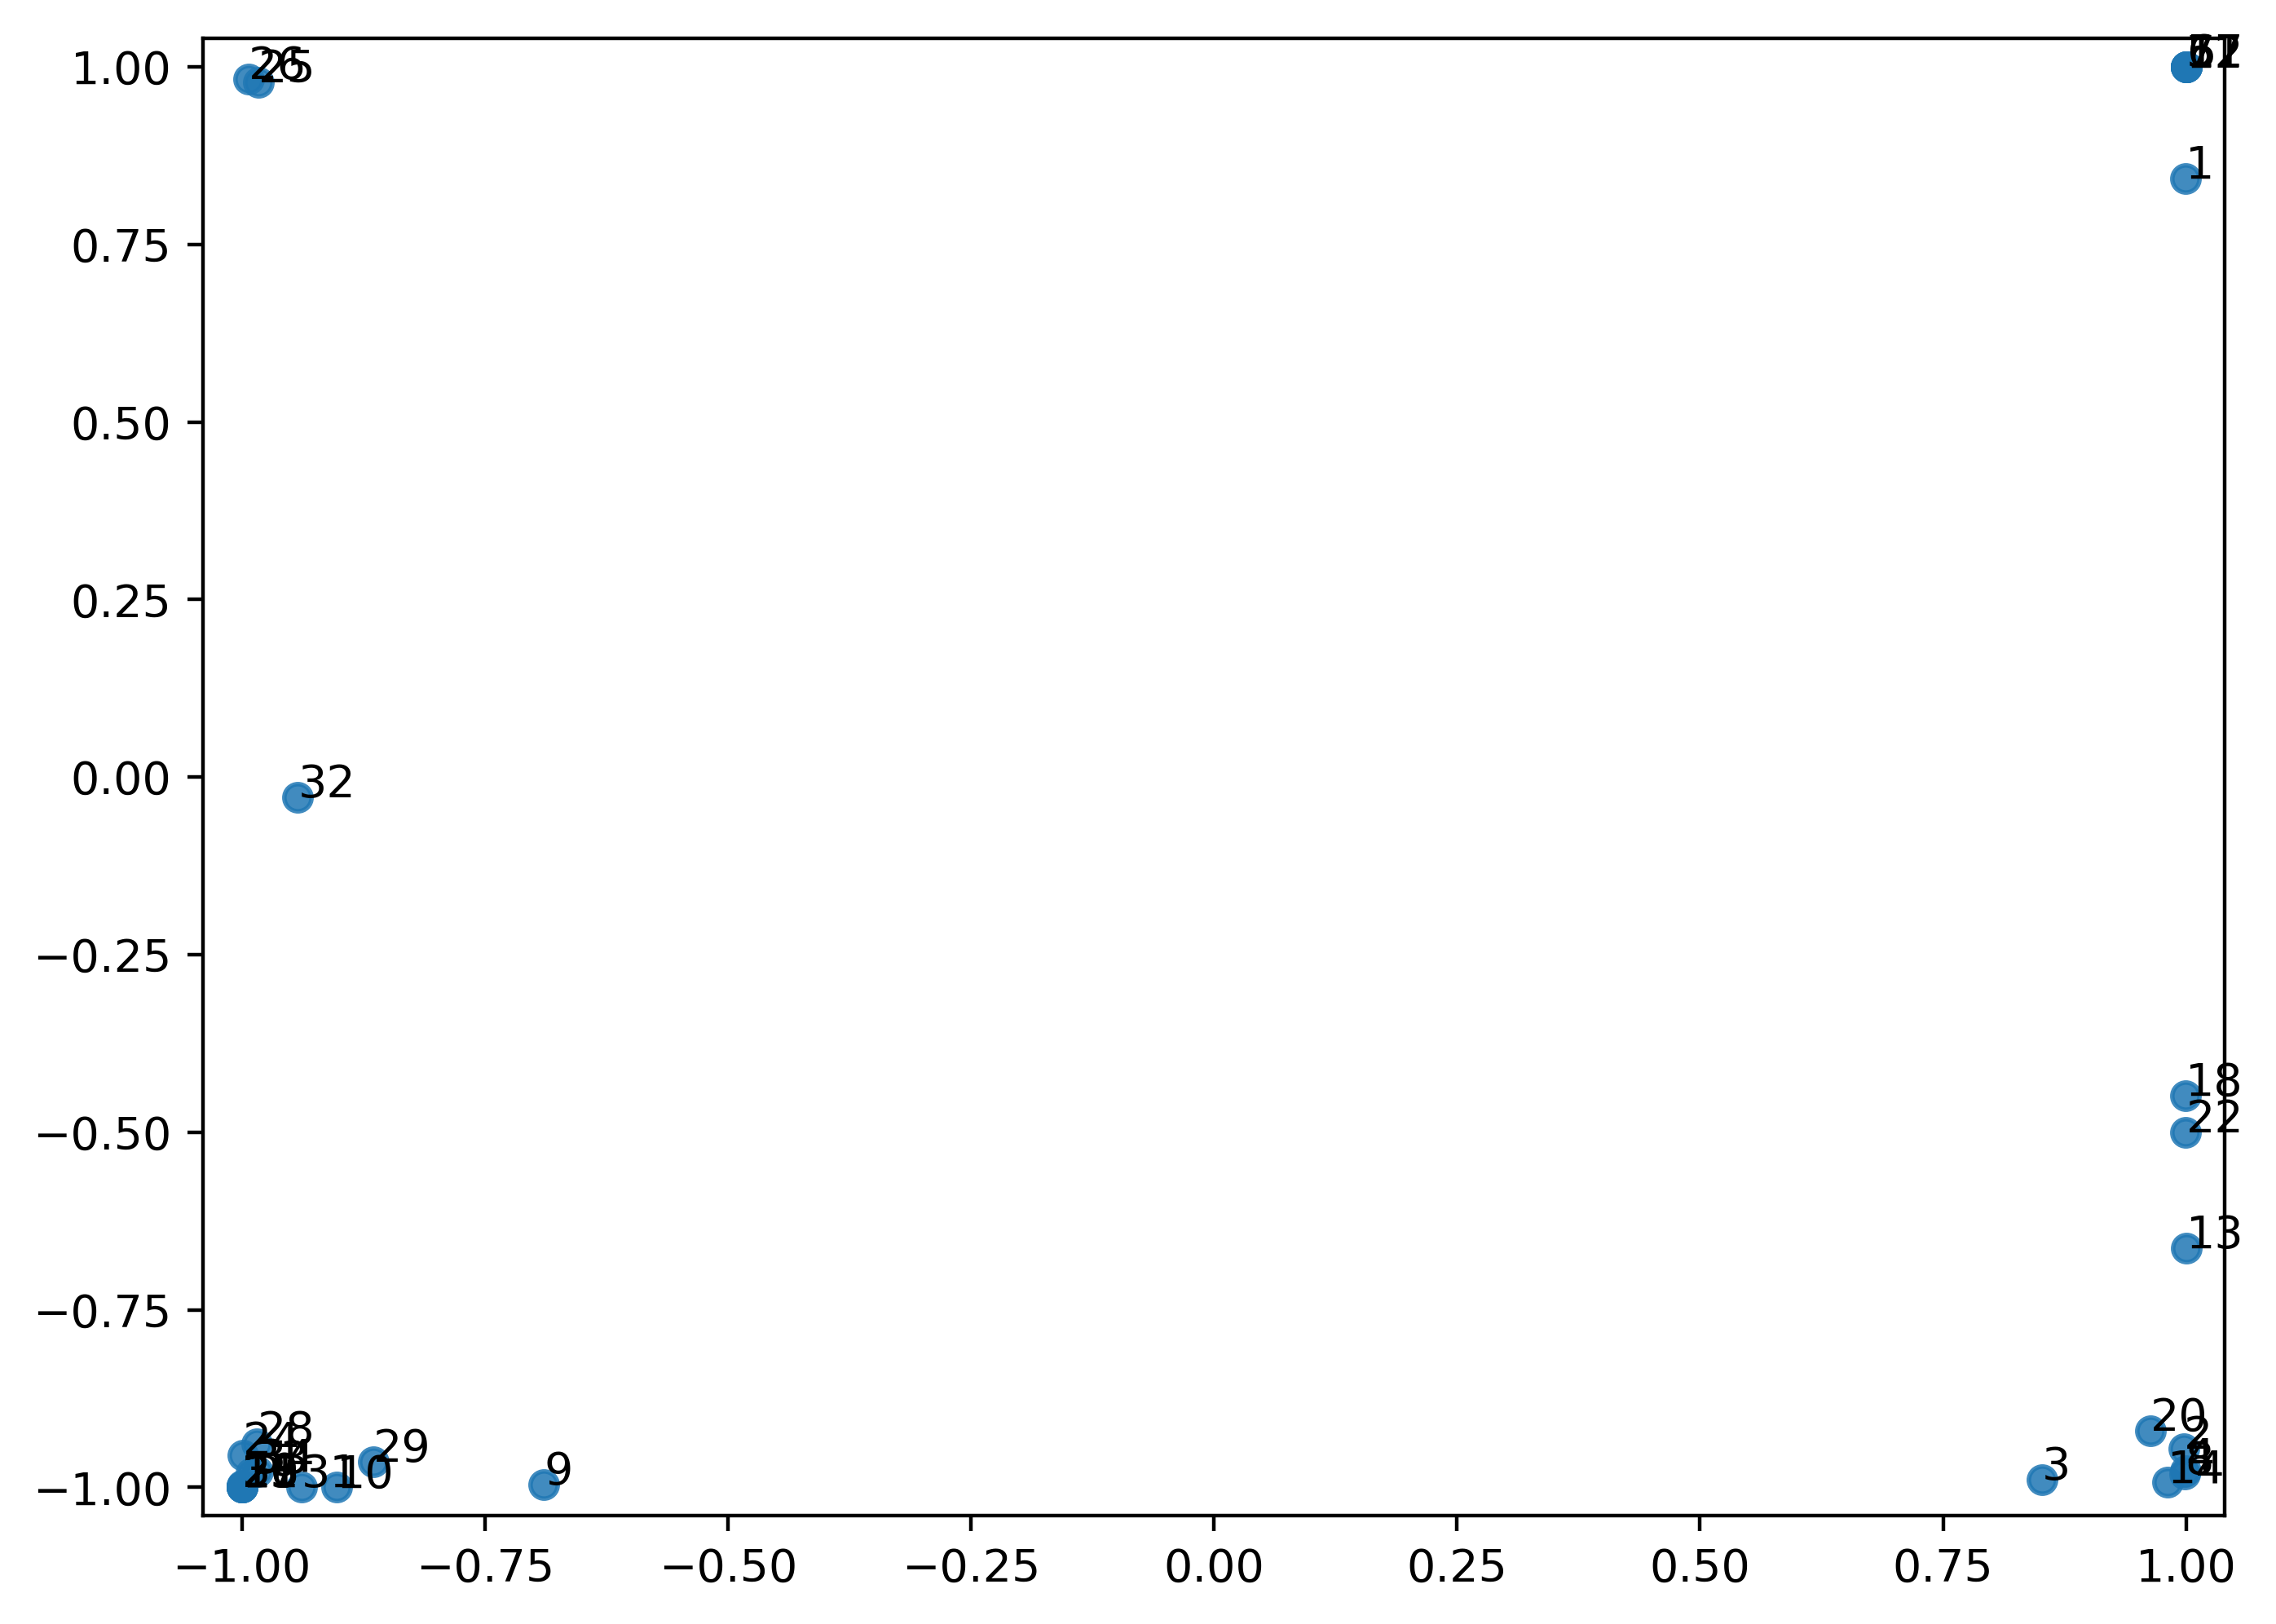

In [4]:

#plotting.scatterplot2D(tnse_pts[:,0],tnse_pts[:,1],embedding_nodes)
#plotting.scatterplot2D(umap_pts[:,0],umap_pts[:,1],embedding_nodes)

pts = np.array(embedding_vectors)
plotting.scatterplot2D(pts[:,0],pts[:,1],embedding_nodes)


In [5]:
import unicodecsv as csv 

def get_category_tuple(filename, skip_first_line=False):
    source_names = []
    target_names = []
    with open(filename, 'r') as csvfile:
        graphreader = csv.reader(csvfile)
        i = 0
        for row in graphreader:
            if skip_first_line and i == 0:
                i += 1
                continue
            source_names.append(row[0])
            target_names.append(row[1])
    return zip(source_names, target_names)

def get_category_embeddings(category, embeddings_dict):
    # category is a list a of types (source node name, category label)
    category_embeddings = []
    category_labels = []
    for i in category:
        category_embeddings.append(embeddings_dict[i[0]])
        category_labels.append(i[1])
    return (category_embeddings, category_labels)

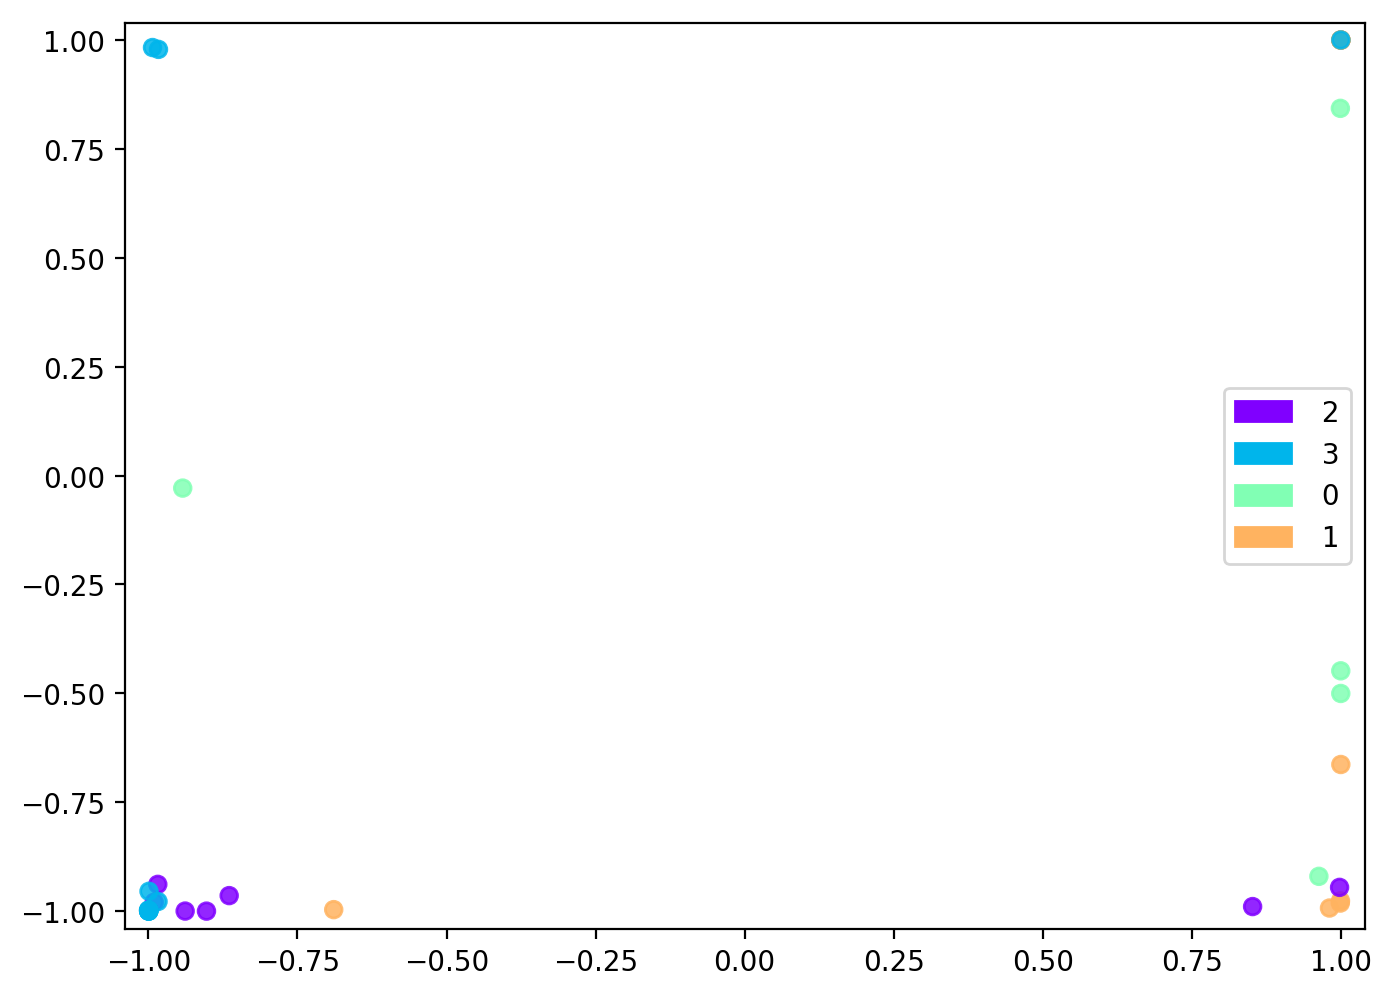

In [6]:
category_relation = get_category_tuple('data/karate/karate_targets.csv', skip_first_line=True)
operator_embeds, operator_labels = get_category_embeddings(category_relation, embeddings_dict)

#tnse_pts = plotting.tsneND(operator_embeds, 2)
#plotting.scatterplot2D_legend(tnse_pts[:,0],tnse_pts[:,1],operator_labels)
#umap_pts = plotting.umap2D(operator_embeds)
#plotting.scatterplot2D_legend(umap_pts[:,0],umap_pts[:,1],operator_labels)

pts = np.array(embedding_vectors)
plotting.scatterplot2D_legend(pts[:,0],pts[:,1],operator_labels)

In [ ]:
operator_embeds = np.array(operator_embeds)
plotting.scatterplot3D_legend(operator_embeds[:,0],operator_embeds[:,1],operator_embeds[:,2], operator_labels)
#plotting.scatterplot3D_legend(tnse_pts_3d[:,0],tnse_pts_3d[:,1], tnse_pts_3d[:,2], operator_labels)

In [ ]:
category_relation = graph.get_list_of_relation("TAKES_ARGUMENTS")
operator_embeds, operator_labels = get_category_embeddings(category_relation, embeddings_dict)
#tnse_pts = plotting.tsne2D(operator_embeds)
#plotting.scatterplot2D_legend(tnse_pts[:,0],tnse_pts[:,1],operator_labels)
#umap_pts = plotting.umap2D(operator_embeds)
#plotting.scatterplot2D_legend(umap_pts[:,0],umap_pts[:,1],operator_labels)
operator_embeds = np.array(operator_embeds)
plotting.scatterplot3D_legend(operator_embeds[:,0],operator_embeds[:,1], operator_embeds[:,2], operator_labels)


In [ ]:
category_relation = graph.get_list_of_relation("RETURNS")
operator_embeds, operator_labels = get_category_embeddings(category_relation, embeddings_dict)
#tnse_pts = plotting.tsne2D(operator_embeds)
#plotting.scatterplot2D_legend(tnse_pts[:,0],tnse_pts[:,1],operator_labels)
#umap_pts = plotting.umap2D(operator_embeds)
#plotting.scatterplot2D_legend(umap_pts[:,0],umap_pts[:,1],operator_labels)
operator_embeds = np.array(operator_embeds)
plotting.scatterplot3D_legend(operator_embeds[:,0],operator_embeds[:,1], operator_embeds[:,2], operator_labels)


In [ ]:
category_relation = graph.get_list_of_relation("TAKES_ARGTYPE")
operator_embeds, operator_labels = get_category_embeddings(category_relation, embeddings_dict)
tnse_pts = plotting.tsne2D(operator_embeds)
plotting.scatterplot2D_legend(tnse_pts[:,0],tnse_pts[:,1],operator_labels)
umap_pts = plotting.umap2D(operator_embeds)
plotting.scatterplot2D_legend(umap_pts[:,0],umap_pts[:,1],operator_labels)